<a href="https://colab.research.google.com/github/albertopolini/Advanced-Machine-Learning/blob/main/some_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fully Connected Feed-Forward Network

In this notebook we will play with Feed-Forward FC-NN (Fully Connected Neural Network) for a *classification task*: 

Image Classification on MNIST Dataset

**RECALL**

In the FC-NN, the output of each layer is computed using the activations from the previous one, as follows:

$$h_{i} = \sigma(W_i h_{i-1} + b_i)$$

where ${h}_i$ is the activation vector from the $i$-th layer (or the input data for $i=0$), ${W}_i$ and ${b}_i$ are the weight matrix and the bias vector for the $i$-th layer, respectively. 
<br><rb>
$\sigma(\cdot)$ is the activation function. In our example, we will use the *ReLU* activation function for the hidden layers and *softmax* for the last layer.

Our loss function will be the **categorical crossentropy**.

## Import libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from keras.backend import abs, sum
import tensorflow as tf

%matplotlib inline

## Data preparation (`keras.dataset`)

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of $60,000$ examples and a test set of $10,000$ examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](http://arxiv.org/abs/1708.07747)**

<img src="https://miro.medium.com/max/758/1*cd0yDlTocSud8W-nT308PQ.png" width="80%" />



<img src="https://hanxiao.github.io/2017/08/26/Fashion-MNIST-a-Drop-In-Replacement-of-MNIST-for-Benchmarking-Machine-Learning-Algorithms/embedding.gif" width="80%" />


Since this dataset is **provided** with Keras, we just ask the `keras.dataset` model for training and test data.

We will:

* download the data
* reshape data to be in vectorial form (original data are images)
* normalize between 0 and 1.

The `categorical_crossentropy` loss expects a **one-hot-vector** as input, therefore we apply the `to_categorical` function from `keras.utilis` to convert integer labels to **one-hot-vectors**.

In [25]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [28]:
print('Number of categories:',len(set(y_train)))

Number of categories: 10


In [29]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale (normalization)
X_train /= 255
X_test /= 255
#
## convert class vectors to binary class matrices (one hot encode). 
#They are already numbers so you can use the function directly to_categorical
Y_train =  np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [30]:
Y_train, y_train

(array([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([9, 0, 0, ..., 3, 0, 5], dtype=uint8))

#### Split Training and Validation Data

In [31]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

In [32]:
print('Size of the train set:', X_train.shape)

Size of the train set: (45000, 784)


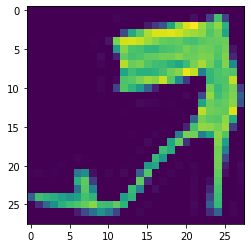

In [33]:
# Display data as an image on a 2D regular raster.
# The input may either be actual RGB(A) data, or 2D scalar data,
# which will be rendered as a pseudocolor image

plt.imshow(X_train[6].reshape(28, 28))

In [34]:
print(np.asarray(range(10)))
print(Y_train[6].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 1 0 0 0 0]


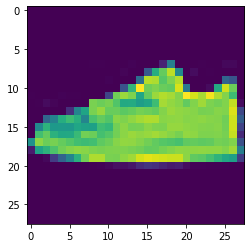

In [35]:
plt.imshow(X_val[0].reshape(28, 28))

In [36]:
print(np.asarray(range(10)))
print(Y_val[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 0 0 1 0 0]


## Model definition

In our case we build a Sequential model with five [Dense](http://keras.io/layers/core/#dense) (aka fully connected) layers. Notice that the output layer has the softmax activation function. 

The resulting model is actually a `function` of its own inputs implemented using the Keras backend. 

We apply the categorical crossentropy loss and choose SGD as the optimizer. 

Please remind that Keras supports a variety of different [optimizers](http://keras.io/optimizers/) and [loss functions](http://keras.io/objectives/), which you may want to check out. 

## Training
Having defined and compiled the model, it can be trained using the `fit` function. We also specify a validation dataset to monitor validation loss and accuracy.

In [37]:
dims = X_train.shape[1]

nb_classes = 10

#"advanced" usage -- a possible way to initialize weights ..> https://keras.io/api/layers/initializers/
initializer = tf.keras.initializers.GlorotUniform(seed=1234) 

# BUILD
model = Sequential()
model.add(Dense(512, input_shape=(dims,), activation = "relu", kernel_initializer=initializer))
model.add(Dense(256, activation = "relu", kernel_initializer=initializer))
model.add(Dense(32, activation = "relu", kernel_initializer=initializer))
model.add(Dense(16, activation = "relu", kernel_initializer=initializer))
model.add(Dense(nb_classes, activation = "softmax", kernel_initializer=initializer))


# COMPILE --> optimization details

from tensorflow.keras.optimizers import SGD # yet another way to set up optimizers explicitly --> https://keras.io/api/optimizers/
model.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [38]:
# We already used `summary`
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                170       
Total params: 542,170
Trainable params: 542,170
Non-trainable params: 0
_________________________________________________________________


In [39]:
#train! --> notice the validation steps

n_epochs =20
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=n_epochs, verbose=2, validation_data=(X_val, Y_val))

Epoch 1/20
352/352 - 2s - loss: 2.1969 - accuracy: 0.2925 - val_loss: 2.0995 - val_accuracy: 0.3909
Epoch 2/20
352/352 - 1s - loss: 2.0145 - accuracy: 0.4178 - val_loss: 1.9309 - val_accuracy: 0.4304
Epoch 3/20
352/352 - 1s - loss: 1.8422 - accuracy: 0.4449 - val_loss: 1.7533 - val_accuracy: 0.4566
Epoch 4/20
352/352 - 1s - loss: 1.6546 - accuracy: 0.4782 - val_loss: 1.5605 - val_accuracy: 0.5038
Epoch 5/20
352/352 - 1s - loss: 1.4629 - accuracy: 0.5271 - val_loss: 1.3727 - val_accuracy: 0.5535
Epoch 6/20
352/352 - 1s - loss: 1.2797 - accuracy: 0.5932 - val_loss: 1.1966 - val_accuracy: 0.6220
Epoch 7/20
352/352 - 1s - loss: 1.1192 - accuracy: 0.6441 - val_loss: 1.0535 - val_accuracy: 0.6595
Epoch 8/20
352/352 - 1s - loss: 0.9972 - accuracy: 0.6741 - val_loss: 0.9503 - val_accuracy: 0.6843
Epoch 9/20
352/352 - 1s - loss: 0.9106 - accuracy: 0.6959 - val_loss: 0.8773 - val_accuracy: 0.7043
Epoch 10/20
352/352 - 1s - loss: 0.8478 - accuracy: 0.7150 - val_loss: 0.8228 - val_accuracy: 0.7204

### Plotting Network Performance Trend
The return value of the `fit` function is a `keras.callbacks.History` object which contains the entire history of training/validation loss and accuracy, for each epoch. We can therefore plot the behaviour of loss and accuracy during the training phase.

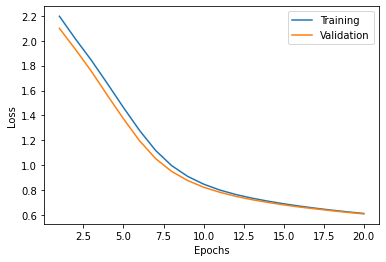

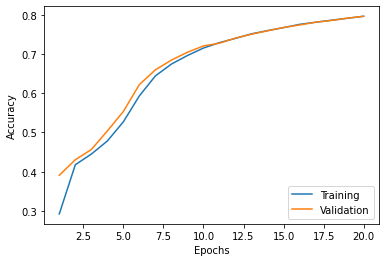

In [40]:
x_plot = list(range(1,n_epochs+1))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

After `20` epochs, we get a `~80%` validation accuracy.

* If you increase the number of epochs, you will get definitely better results.

---

# Inspecting Layers

not essential, but will use this to check the regularization effects

In [41]:
print('Model Input Tensors: ', model.input, end='\n\n')
print('Layers - Network Configuration:', end='\n\n')
for layer in model.layers:
    print(layer.name, layer.trainable)
    print('Layer Configuration:')
    print(layer.get_config(), end='\n{}\n'.format('----'*10))
print('Model Output Tensors: ', model.output)

Model Input Tensors:  KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='dense_5_input'), name='dense_5_input', description="created by layer 'dense_5_input'")

Layers - Network Configuration:

dense_5 True
Layer Configuration:
{'name': 'dense_5', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': 1234}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
----------------------------------------
dense_6 True
Layer Configuration:
{'name': 'dense_6', 'trainable': True, 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': 1234}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {

In [42]:
for layer in range(len(model.get_weights())):
    print('Layer name:', model.weights[layer].name)
    print('Layer weights shape:', model.weights[layer].shape)
    print('Weight:', model.weights[layer], end = '\n\n')
    #print(layer.get_config(), end='\n{}\n'.format('----'*10))
print('Model Output Tensors: ', model.output)

Layer name: dense_5/kernel:0
Layer weights shape: (784, 512)
Weight: <tf.Variable 'dense_5/kernel:0' shape=(784, 512) dtype=float32, numpy=
array([[ 0.03288732,  0.06419916, -0.04038084, ...,  0.0501196 ,
        -0.01636986,  0.00267079],
       [-0.05238051,  0.01568971,  0.06354105, ..., -0.03587913,
        -0.03614935, -0.02498366],
       [ 0.0055944 ,  0.01631762,  0.02852674, ...,  0.0222851 ,
         0.02921189,  0.01434655],
       ...,
       [-0.00113957, -0.04627939, -0.04602685, ...,  0.02524721,
         0.02275002,  0.03974579],
       [-0.01206601,  0.0272265 ,  0.01920352, ...,  0.02996068,
         0.00329956, -0.00560015],
       [-0.05587083,  0.04224663, -0.04761815, ..., -0.03192603,
         0.05160813,  0.03516154]], dtype=float32)>

Layer name: dense_5/bias:0
Layer weights shape: (512,)
Weight: <tf.Variable 'dense_5/bias:0' shape=(512,) dtype=float32, numpy=
array([ 1.89845078e-03, -1.82288862e-03,  6.35058945e-03,  1.86150067e-03,
        4.48501995e-03,  1.

# Regularization

Regularization is a technique that makes slight changes to the learning algorithm to reduce overfitting and generalize better. This in turn improves the performance of the model even on invisible data (test set).

### L1 Kernel/Bias regularization

Applying [L1 regularization](https://keras.io/api/layers/regularizers/) to the kernel and bias values. New loss function: $$L(x,y) = L(x,y) + \lambda\sum_{j=0}^{M}|W_j|$$

where:
*   $\lambda$ parameter controls the impact of regularization
*   $W$ corresponds to the model weights



In [43]:
from tensorflow.keras import regularizers

model_l1 = Sequential()
model_l1.add(Dense(512, input_shape=(dims,), activation = "relu",kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(256, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(32, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(16, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(Dense(nb_classes, activation = "softmax", kernel_initializer=initializer))

model_l1.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
model_l1.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])
model_l1.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=2, validation_data=(X_val, Y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
352/352 - 2s - loss: 194.3665 - accuracy: 0.2849 - val_loss: 185.0439 - val_accuracy: 0.3831
Epoch 2/20
352/352 - 2s - loss: 176.1348 - accuracy: 0.4115 - val_loss: 167.3177 - val_accuracy: 0.4243
Epoch 3/20
352/352 - 2s - loss: 158.8855 - accuracy: 0.4389 - val_loss: 150.5419 - val_accuracy: 0.4449
Epoch 4/20
352/352 - 2s - loss: 142.5757 - accuracy: 0.4552 - val_loss: 134.7050 - val_accuracy: 0.4532
Epoch 5/20
352/352 - 2s - loss: 127.2074 - accuracy: 0.4599 - val_loss: 119.8069 - val_accuracy: 0.4594
Epoch 6/20
352/352 - 1s - loss: 112.7731 - accuracy: 0.4640 - val_loss: 105.8406 - val_accuracy: 0.4644
Epoch 7/20
352/352 - 2s - loss: 99.2715 - accuracy: 0.4669 - val_loss: 92.8076 - val_accuracy: 0.4671
Epoch 8/20
352/352 - 2s - loss: 86.7020 - accuracy: 0.4697 - val_loss: 80.7074 - val_accuracy: 0.4669
Epoch 9/20
352/352 - 1s - loss: 75.0699 - accuracy: 0.4703 - val_loss: 69.5460 - val_accuracy: 0.4673
Epoch 10/20
352/352 - 2s - loss: 64.3757 - accuracy: 0.4695 - val_loss

### L2 Kernel/Bias regularization

Applying [L2 regularization](https://keras.io/api/layers/regularizers/) to the kernel and bias values. New loss function: $$L(x,y) = L(x,y) + \lambda\sum_{j=0}^{M}W_j^2$$

where:
*   $\lambda$ parameter controls the impact of regularization
*   $W$ corresponds to the model weights



In [44]:
model_l2 = Sequential()
model_l2.add(Dense(512, input_shape=(dims,), activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(256, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(32, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(16, activation = "relu", kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(Dense(nb_classes, activation = "softmax"))

model_l2.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])
model_l2.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])
model_l2.fit(X_train, Y_train, batch_size=128, 
                            epochs=20, verbose=2, validation_data=(X_val, Y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
352/352 - 3s - loss: 12.4422 - accuracy: 0.2996 - val_loss: 12.2227 - val_accuracy: 0.4080
Epoch 2/20
352/352 - 2s - loss: 12.0224 - accuracy: 0.4546 - val_loss: 11.8262 - val_accuracy: 0.4792
Epoch 3/20
352/352 - 2s - loss: 11.6351 - accuracy: 0.5148 - val_loss: 11.4478 - val_accuracy: 0.5715
Epoch 4/20
352/352 - 2s - loss: 11.2681 - accuracy: 0.6250 - val_loss: 11.1007 - val_accuracy: 0.6483
Epoch 5/20
352/352 - 2s - loss: 10.9534 - accuracy: 0.6595 - val_loss: 10.8208 - val_accuracy: 0.6629
Epoch 6/20
352/352 - 2s - loss: 10.7018 - accuracy: 0.6700 - val_loss: 10.5936 - val_accuracy: 0.6711
Epoch 7/20
352/352 - 2s - loss: 10.4926 - accuracy: 0.6822 - val_loss: 10.3994 - val_accuracy: 0.6867
Epoch 8/20
352/352 - 2s - loss: 10.3096 - accuracy: 0.6968 - val_loss: 10.2261 - val_accuracy: 0.6996
Epoch 9/20
352/352 - 2s - loss: 10.1430 - accuracy: 0.7096 - val_loss: 10.0663 - val_accuracy: 0.7111
Epoch 10/20
352/352 - 2s - loss: 9.9882 - accuracy: 0.7203 - val_loss: 9.9153 - va

### Weight Control

We will analyze how the weights have changed by introducing the penalties in the model

In [45]:
print('Layers name:', model.weights[6].name)
print('Layers kernel shape:', model.weights[6].shape)
print('Kernel:', model.weights[6][0], end = '\n\n')
print('Layers name:', model.weights[7].name)
print('Layers kernel shape:', model.weights[7].shape)
print('Kernel:', model.weights[7])

Layers name: dense_8/kernel:0
Layers kernel shape: (32, 16)
Kernel: tf.Tensor(
[ 0.1706729   0.33828676 -0.20983306  0.23975566 -0.06396012 -0.20890412
 -0.02448472  0.3441409   0.3484738  -0.19815932 -0.00264065  0.04241682
 -0.15306771  0.2024269  -0.04934072 -0.16474842], shape=(16,), dtype=float32)

Layers name: dense_8/bias:0
Layers kernel shape: (16,)
Kernel: <tf.Variable 'dense_8/bias:0' shape=(16,) dtype=float32, numpy=
array([-0.03089224, -0.02662988, -0.00067343,  0.06411781, -0.09680779,
        0.15177134,  0.04695107, -0.00796767,  0.01791414,  0.12600198,
       -0.0267856 ,  0.00085299, -0.02127542, -0.05445017, -0.04319612,
       -0.06959829], dtype=float32)>


In [46]:
print('Layers name:', model_l2.weights[6].name)
print('Layers kernel shape:', model_l2.weights[6].shape)
print('Kernel:', model_l2.weights[6][0], end = '\n\n')
print('Layers name:', model_l2.weights[7].name)
print('Layers kernel shape:', model_l2.weights[7].shape)
print('Kernel:', model_l2.weights[7])

Layers name: dense_18/kernel:0
Layers kernel shape: (32, 16)
Kernel: tf.Tensor(
[ 0.14804125  0.29042384 -0.18226197  0.1758408  -0.04936292 -0.17692558
 -0.01929512  0.2996297   0.29312304 -0.17358461 -0.01360136  0.04342064
 -0.12140647  0.1900244  -0.0506347  -0.14109255], shape=(16,), dtype=float32)

Layers name: dense_18/bias:0
Layers kernel shape: (16,)
Kernel: <tf.Variable 'dense_18/bias:0' shape=(16,) dtype=float32, numpy=
array([-1.8425977e-02,  5.2768212e-02,  5.6730969e-05,  3.5121836e-02,
        1.7354164e-02,  7.5505972e-02, -3.6220703e-02, -3.2940574e-03,
       -5.2755732e-02,  5.3901445e-02, -2.4427719e-02,  3.3735432e-02,
       -1.6804133e-02, -5.1381599e-02,  2.4080297e-02,  4.1840546e-02],
      dtype=float32)>


In [47]:
print('Layers name:', model_l1.weights[6].name)
print('Layers kernel shape:', model_l1.weights[6].shape)
print('Kernel:', model_l1.weights[6][0], end = '\n\n')
print('Layers name:', model_l1.weights[7].name)
print('Layers kernel shape:', model_l1.weights[7].shape)
print('Kernel:', model_l1.weights[7])

Layers name: dense_13/kernel:0
Layers kernel shape: (32, 16)
Kernel: tf.Tensor(
[ 1.02006085e-01  2.77427763e-01 -1.39439702e-01  2.53699601e-01
 -6.17238833e-03 -1.42593503e-01  7.64032120e-06  2.72723049e-01
  2.68889129e-01 -1.29749551e-01  8.22974073e-07  3.66491645e-06
 -1.14774384e-01  8.65984783e-02 -6.85067243e-06 -9.62442011e-02], shape=(16,), dtype=float32)

Layers name: dense_13/bias:0
Layers kernel shape: (16,)
Kernel: <tf.Variable 'dense_13/bias:0' shape=(16,) dtype=float32, numpy=
array([-2.04828621e-06,  2.09852333e-05,  7.94861080e-06,  1.05014466e-01,
       -3.65000560e-05,  1.04609013e-01,  6.97902814e-02,  2.90683147e-06,
        5.94242960e-02,  9.35668573e-02,  7.61114759e-03,  1.61256830e-04,
        4.09884099e-03, -7.17126604e-05,  4.52472921e-03, -1.03492803e-05],
      dtype=float32)>


In [48]:
print('Sum of the values of the weights without regularization:', sum(abs(model.weights[6][0])).numpy() + sum(abs(model.weights[7][0])).numpy())
print('Sum of the values of the weights with regularization l2:', sum(abs(model_l2.weights[6][0])).numpy() + sum(abs(model_l2.weights[7][0])).numpy())
print('Sum of the values of the weights with regularization l1:', sum(abs(model_l1.weights[6][0])).numpy() + sum(abs(model_l1.weights[7][0])).numpy())

Sum of the values of the weights without regularization: 2.7922049
Sum of the values of the weights with regularization l2: 2.3870947
Sum of the values of the weights with regularization l1: 1.8903388


### Dropout

[Dropout](https://keras.io/api/layers/regularization_layers/dropout/) is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass


<img src="https://miro.medium.com/proxy/1*iWQzxhVlvadk6VAJjsgXgg.png" width="60%" />




```python
from keras.layers import Dropout

Dropout(rate, noise_shape=None, seed=None, **kwargs)
```

* `rate`: Float between 0 and 1. Fraction of the input units to drop

* `noise_shape`: 1D integer tensor representing the shape of the binary dropout mask that will be multiplied with the input. For instance, if your inputs have shape (batch_size, timesteps, features) and you want the dropout mask to be the same for all timesteps, you can use noise_shape=(batch_size, 1, features)

* `seed`: A Python integer to use as random seed.

In [49]:
initializer = tf.keras.initializers.GlorotUniform(seed=1234)


model_d = Sequential()
model_d.add(Dense(512, input_shape=(dims,), activation = "relu", kernel_initializer=initializer))
model_d.add(Dense(256, activation = "relu", kernel_initializer=initializer))
model_d.add(Dropout(0.2))
model_d.add(Dense(32, activation = "relu", kernel_initializer=initializer))
model_d.add(Dropout(0.2))
model_d.add(Dense(16, activation = "relu", kernel_initializer=initializer))
model_d.add(Dropout(0.2))
model_d.add(Dense(nb_classes, activation = "softmax", kernel_initializer=initializer))


model_d.compile(optimizer=SGD(lr=0.001), loss='categorical_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [50]:
n_epochs =20
network_history = model_d.fit(X_train, Y_train, batch_size=128, 
                            epochs=n_epochs, verbose=2, validation_data=(X_val, Y_val))

Epoch 1/20
352/352 - 2s - loss: 2.2579 - accuracy: 0.1688 - val_loss: 2.1569 - val_accuracy: 0.3686
Epoch 2/20
352/352 - 1s - loss: 2.1486 - accuracy: 0.2674 - val_loss: 2.0326 - val_accuracy: 0.4142
Epoch 3/20
352/352 - 1s - loss: 2.0484 - accuracy: 0.3187 - val_loss: 1.9145 - val_accuracy: 0.4390
Epoch 4/20
352/352 - 1s - loss: 1.9495 - accuracy: 0.3579 - val_loss: 1.7877 - val_accuracy: 0.4685
Epoch 5/20
352/352 - 1s - loss: 1.8486 - accuracy: 0.3850 - val_loss: 1.6645 - val_accuracy: 0.5012
Epoch 6/20
352/352 - 1s - loss: 1.7557 - accuracy: 0.4064 - val_loss: 1.5477 - val_accuracy: 0.5287
Epoch 7/20
352/352 - 1s - loss: 1.6661 - accuracy: 0.4297 - val_loss: 1.4454 - val_accuracy: 0.5494
Epoch 8/20
352/352 - 1s - loss: 1.5897 - accuracy: 0.4443 - val_loss: 1.3486 - val_accuracy: 0.5724
Epoch 9/20
352/352 - 1s - loss: 1.5185 - accuracy: 0.4613 - val_loss: 1.2650 - val_accuracy: 0.5989
Epoch 10/20
352/352 - 1s - loss: 1.4598 - accuracy: 0.4822 - val_loss: 1.1949 - val_accuracy: 0.6317

# Early Stopping

<pre>To avoid overfitting, we will first split out data to training set and test set and test out model on the test set.
Next: we will use two of keras's callbacks <b>EarlyStopping</b> and <b>ModelCheckpoint</b></pre>

See also https://keras.io/api/callbacks/
---

In [51]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [54]:
fBestModel = 'best_model.h5' 
early_stop = EarlyStopping(monitor='val_loss', patience=2, min_delta = 0.1, verbose=1) 
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

batch_size = 128

model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=n_epochs, 
          batch_size=batch_size, verbose=True, callbacks=[best_model, early_stop]) 

Epoch 1/20
352/352 [==============================] - 2s 6ms/step - loss: 0.6003 - accuracy: 0.7989 - val_loss: 0.5977 - val_accuracy: 0.7987
Epoch 2/20
352/352 [==============================] - 2s 5ms/step - loss: 0.5895 - accuracy: 0.8040 - val_loss: 0.5885 - val_accuracy: 0.8003
Epoch 3/20
352/352 [==============================] - 2s 5ms/step - loss: 0.5796 - accuracy: 0.8067 - val_loss: 0.5810 - val_accuracy: 0.8031
Epoch 00003: early stopping
